# Task 3 Backpropogation 

In [5]:
#/==================================
#// Computer Vision
#// Student: Vandit Jyotindra Gajjar
#// Student ID: a1779153
#// Semester: 1
#// Year: 2020
#// Assignment: 3
#//===================================

In this part of the assignment, we are going to implement an XORnet. 

![The XOR Truth Table](https://cdn-images-1.medium.com/max/1600/1*Xp1D32f-br8RCng5gjZMCA.gif)

XOR is a problem that is not linearly separable, it means we need a hidden layer in our network. 

![XOR is not linearly separable](http://web.science.mq.edu.au/~cassidy/comp449/html/xor.gif)

The network we are going implement below will use sigmoid function as activation and we are going to use Mean Squared Error as the loss. 


**Network design**

The network has three layers:


*  Input Layer (Taking two input A,B and a bias): This has a size of 3
*  Hidden Layer (you can change the number of neuron in this layer)
* Output Layer: This has a size of 1 as we are generating a single number for every input


**Functions to implement **

* forward(): That takes the current inputs, passes it through the network and generates and output y_hat
* backward(): That does back-propagation to update weight. The sigmoid function and its derivative are provided. You have to derive the gradients **dW1** and **dW2** to updates weights *W1* and *W2*. The formula for update is given.


In [6]:
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1.0/(1+ np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1.0 - sigmoid(x))
  
class XORnet:
    def __init__(self, x, y, h_size):

        self.input = x
        self.y = y
        
        self.W_1 = np.random.rand(self.input.shape[1],h_size) 
        self.W_2 = np.random.rand(h_size,1) 
        
        self.output = np.zeros(self.y.shape) # This is y_hat (the output)

    def forward(self):

        Z_1 = np.dot(self.input, self.W_1)
        A_1 = sigmoid(Z_1)
        Z_2 = np.dot(A_1, self.W_2)
        self.output = sigmoid(Z_2)
        return np.dot((self.y - self.output).T, (self.y - self.output))
      
    def backward(self):

        example, l_r = self.input.shape[0], 0.001
           
        dZ_2 = self.y - self.output 
        d_W2 = ((np.dot(sigmoid(np.dot(self.input,self.W_1)).T,dZ_2))/example)*(l_r)
        
        dZ_1 = np.multiply(np.dot(self.W_2,dZ_2.T).T,sigmoid_derivative(np.dot(self.input,self.W_1)))
        d_W1 = (np.dot(self.input.T,dZ_1)/example)*(l_r)#chain rule.

        self.W_2 +=  d_W2
        self.W_1 +=  d_W1
        


Expected Output: 
 [[0. 1. 1. 0.]]
Current output :
 [[0.49537265 0.49779206 0.50735036 0.50700254]]
[[0.99736212]]


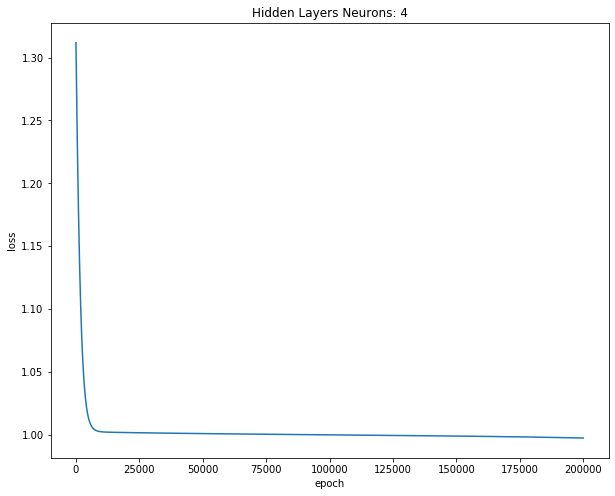

Wall time: 8.21 s


In [7]:
%%time
num_iterations = 200000
num_hidden_neurons = 4

X = np.array([[0,0,1],
              [0,1,1],
              [1,0,1],
              [1,1,1.]]) 

X = X[:,:-1]

Y = np.array([[0],
              [1],
              [1],
              [0.]])

net = XORnet(X,Y,num_hidden_neurons)

losses = np.zeros((num_iterations,1))

for i in range(num_iterations):
    loss = net.forward()
    losses[i] = loss
    net.backward()

print("Expected Output: \n",  (Y.T))
print("Current output :\n", net.output.T)
print(loss)

plt.figure(figsize=[10,8])
plt.plot(losses)
plt.title('Hidden Layers Neurons: '+str(num_hidden_neurons))
plt.xlabel('epoch')
plt.ylabel('loss')
plt.savefig('Hidden Layers Neurons_'+str(num_hidden_neurons)+'.png')
plt.show()